In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [11]:
print(df.head())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False       False        True  
1          PC 17599  71.2833        True       False       False  
2  STON/O2. 3101282   7.9250       False       False        True  
3            113803  53.1000

In [12]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_C   891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(2)
memory usage: 72.3+ KB
None


In [6]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)


/tmp/ipython-input-286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)


/tmp/ipython-input-409735578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/tmp/ipython-input-409735578.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'])

In [10]:
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

NameError: name 'plt' is not defined

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

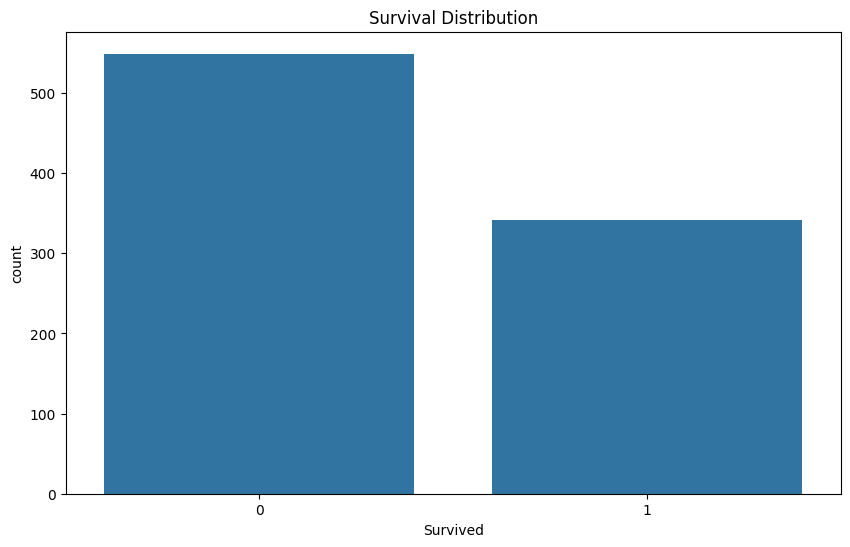

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

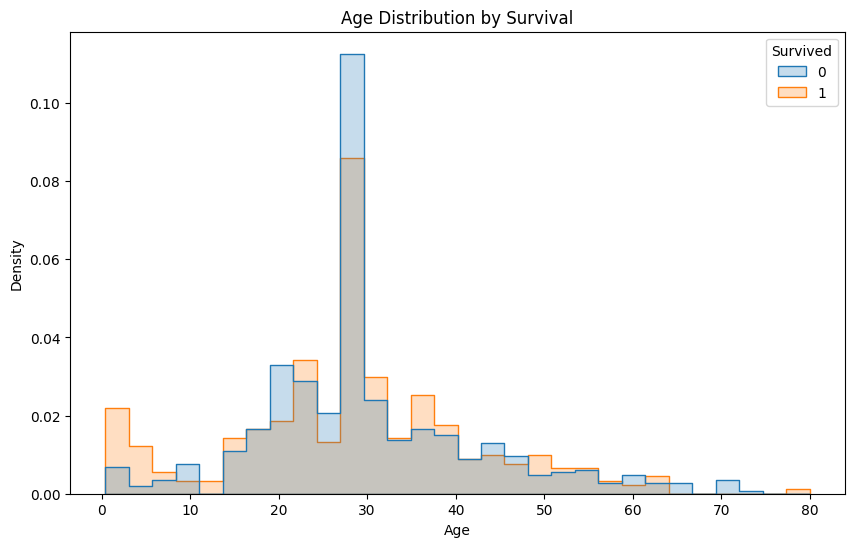

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Survived', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Survival')
plt.show()

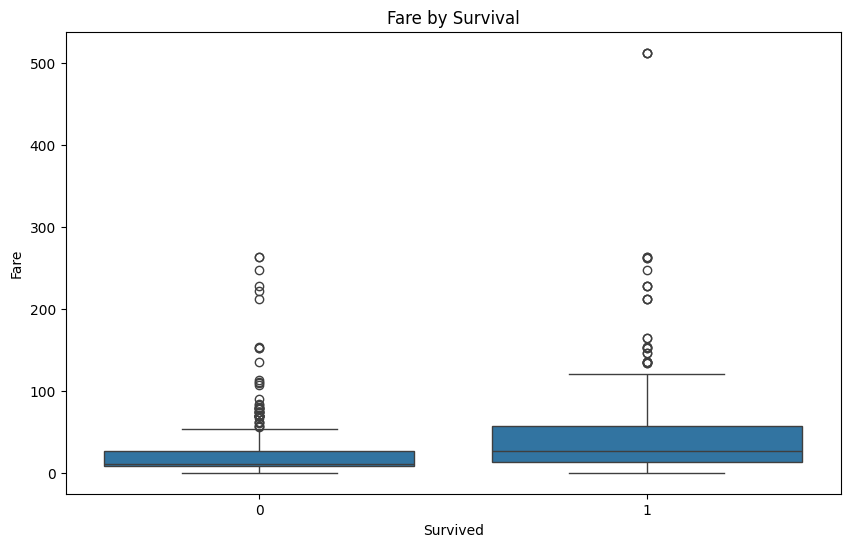

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare by Survival')
plt.show()

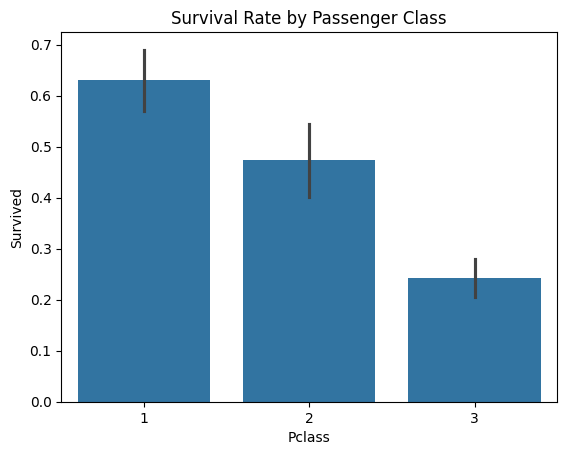

In [19]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

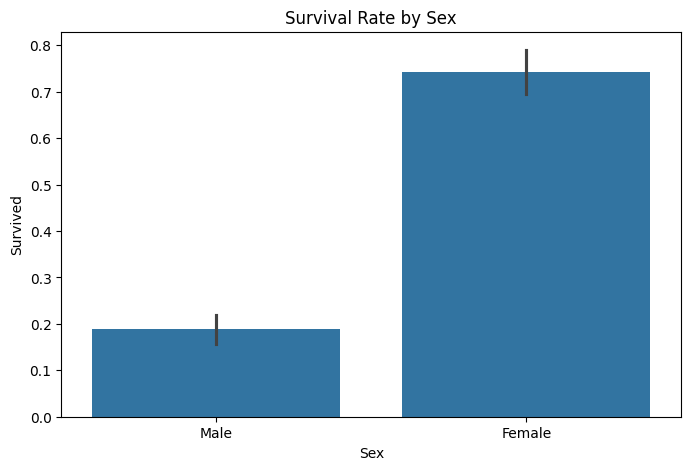

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.xticks([0,1], ['Male', 'Female'])
plt.title('Survival Rate by Sex')
plt.show()


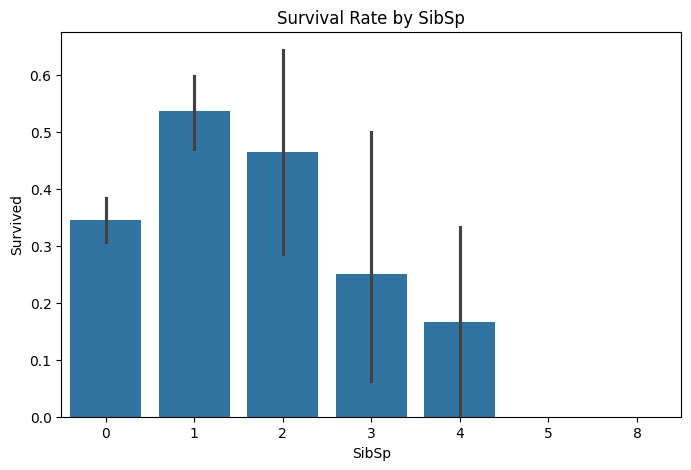

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp')
plt.show()


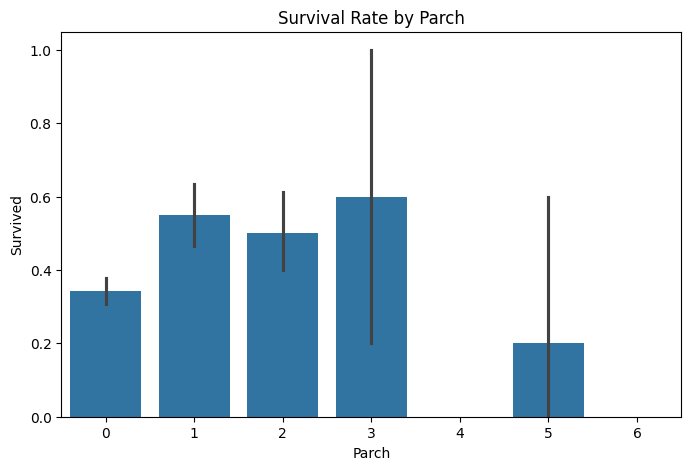

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parch')
plt.show()